# Statistical Methods in Engineering Project - Task 2
Name: Samarth Chetan <br>
NUID: 002780999 <br>
Email: chetan.s@northeastern.edu



**Task 2 - Regression**

Dataset - https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data/data

In [2]:
# importing the necessary libraries to carry out analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pointbiserialr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Exploring the dataset**

In [3]:
# reading the dataset and storing it in the variable called df1
df1 = pd.read_csv('Marketing_Sales.csv')
df1.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
# displaying the shape of the dataframe
df1.shape

(4572, 5)

In [5]:
# displaying the type of information containd in the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
# getting a description of the numerical values of the dataframe
df1.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [7]:
# describing the nature of the categorical column
df1['Influencer'].describe()

count     4572
unique       4
top       Mega
freq      1158
Name: Influencer, dtype: object

**Handling missing values**

In [8]:
# finding the sum of missing values in every column
df1.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [9]:
# creating a copy of the dataframe to handle missing values
df1_null = df1[df1.isnull().any(axis = 1)]
df1_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 13 to 236
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            16 non-null     float64
 1   Radio         22 non-null     float64
 2   Social Media  20 non-null     float64
 3   Influencer    26 non-null     object 
 4   Sales         20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [10]:
# taking a look at all the null values
df1_null.head(3)

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784


In [11]:
# creating an updated dataframe after dropping missing values
df1_cleaned = df1.dropna()

In [12]:
# verifying the columns of the cleaned dataframe
df1_cleaned.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [13]:
# taking a look at the new, cleaned dataset
df1_cleaned.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


Since we are making use of Linear Regression, it is important that the 'Sales' column is linearly dependent on other features of the dataset. Hence, making use of PairGrid


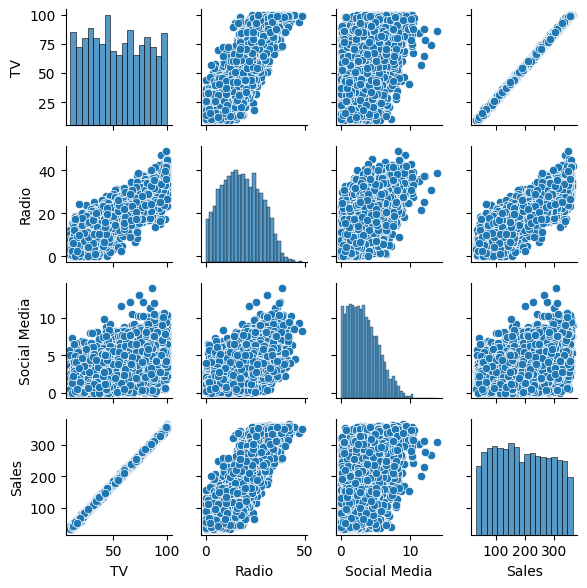

In [14]:
# making use of Seaborn to plot the PairGrid
g = sns.PairGrid(df1_cleaned, height = 1.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

From the above plot, we can observe that: <br>
* 'Sales' shows a strong positive linear dependency from 'TV'
* 'Sales' shows a kind of positive linear dependency from 'Social Media'
* 'Sales' shows a positive linear dependency from 'Radio'
* 'Radio' and 'Social Media' features show a positive linear relationship

**Correlation Matrix**

In [15]:
# extracting the numerical columns and creating the correlation matrix
numerical_cols = ['TV', 'Radio', 'Social Media', 'Sales']
correlation = df1_cleaned[numerical_cols].corr()
correlation.round(3)

,TV,Radio,Social Media,Sales
TV,1.000,0.869,0.528,0.999
Radio,0.869,1.000,0.606,0.869
Social Media,0.528,0.606,1.000,0.527
Sales,0.999,0.869,0.527,1.000


We can confirm the results of our visualization through the correlation matrix obtained above

Text(0, 0.5, 'Sales')

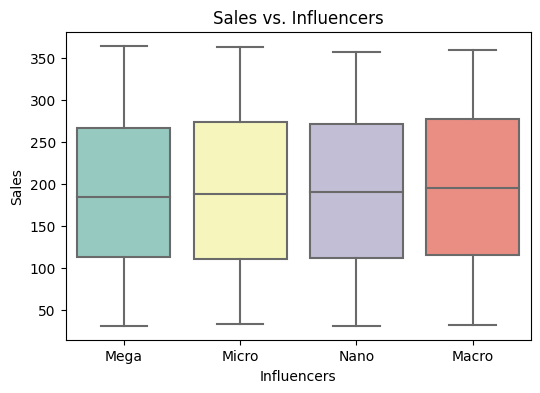

In [16]:
# creating a box-plot for the categorical feature
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'Influencer', y = 'Sales', data = df1_cleaned, palette = 'Set3')
plt.title('Sales vs. Influencers')
plt.xlabel('Influencers')
plt.ylabel('Sales')

We can observe that there are no outliers and the plots are almost similar for the different values present in the 'Influencers' column

**Encoding**

In [17]:
# performing one-hot encoding to convert categorical into numerical data
df1_modified = pd.get_dummies(df1_cleaned, columns = ["Influencer"]).astype(int)
df1_modified.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16,6,2,54,0,1,0,0
1,13,9,2,46,0,1,0,0
2,41,15,2,150,0,1,0,0
3,83,30,6,298,0,1,0,0
4,15,8,1,56,0,0,1,0


In [18]:
# taking a look at the columns of the new dataframe
df1_modified.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

**P-Values**

In [19]:
# finding the Point-Biseral correlation between different values in the 'Influencers' column
influencer_columns = ['Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']
for col in influencer_columns:
    correlation, p_value = pointbiserialr(df1_modified[col], df1_modified['Sales'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {col} with p-value {p_value:.4f}')

0.0224: Point-Biserial Correlation for Influencer_Macro with p-value 0.1313
-0.0125: Point-Biserial Correlation for Influencer_Mega with p-value 0.4006
-0.0052: Point-Biserial Correlation for Influencer_Micro with p-value 0.7242
-0.0044: Point-Biserial Correlation for Influencer_Nano with p-value 0.7646


Since none of the p-values are above 0.05, we can conclude that 'Influencer' has no strong correlation with 'Sales'

In [20]:
# adding an additional feature called 'TV-Radio' to the dataframe
df1_modified['TV_Radio'] = df1_modified['TV'] + df1_modified['Radio']
df1_modified.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,TV_Radio
0,16,6,2,54,0,1,0,0,22
1,13,9,2,46,0,1,0,0,22
2,41,15,2,150,0,1,0,0,56
3,83,30,6,298,0,1,0,0,113
4,15,8,1,56,0,0,1,0,23


In [21]:
# splitting the dataset into testing and training sets
X = df1_modified[['TV', 'Radio', 'Social Media', \
                      'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano',\
                      'TV_Radio']]
y = df1_modified ['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7)

In [22]:
# creating a dictionary to store accuracy metrics of our models
rmse = {}

**Linear Regression**

In [23]:
# creating a Linear Regression model using the 'TV' feature
model_lr = LinearRegression()
model_lr.fit(X_train[['TV']], y_train)
predictions_lr = model_lr.predict(X_test[['TV']])
print('Linear Regression RMSE: ' + str(mean_squared_error(predictions_lr, y_test) ** 0.5))
rmse['Linear Regression with the TV feature'] = mean_squared_error(predictions_lr, y_test) ** 0.5
print(rmse)

Linear Regression RMSE: 2.9679611281793905
{'Linear Regression with the TV feature': 2.9679611281793905}


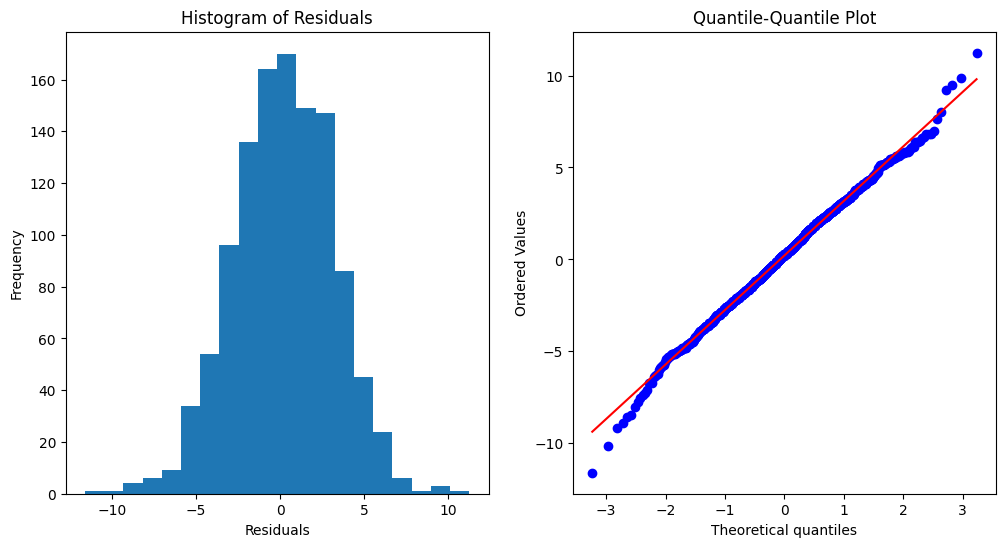

In [24]:
# creating residuals to obtain information regarding distribution
residuals_lr = y_test - predictions_lr
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals_lr, bins = 20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.subplot(1, 2, 2)
stats.probplot(residuals_lr, dist = "norm", plot = plt)
plt.title("Quantile-Quantile Plot")
plt.show()

From the above plot and histogram, we can confirm that the residuals are normally distributed

In [25]:
# displying the intercept and co-efficient of the model
print("Intercept:", model_lr.intercept_)
print("Co-efficients:", model_lr.coef_)

Intercept: -0.5997179531463246
Co-efficients: [3.56001866]


In [37]:
# creating a Linear Regression model using 'TV' and 'Social Media'
model_lr = LinearRegression()
model_lr.fit(X_train[['TV', 'Social Media']], y_train)
predictions_lr = model_lr.predict(X_test[['TV', 'Social Media']])
print('Linear Regression RMSE: ' + str(mean_squared_error(predictions_lr, y_test) ** 0.5))
rmse['Linear regression with the TV and Social Media features'] = mean_squared_error(predictions_lr, y_test) ** 0.5
print(rmse)

Linear Regression RMSE: 2.968040381008341
{'Linear Regression with the TV feature': 2.9679611281793905, 'Linear regression with the TV and Social Media features': 2.968040381008341, 'Linear regression with the combined TV and Radio feature': 13.229503050574062, 'Decision Tree with max_depth = 2': 23.305238142648893, 'Decision Tree with max_depth = 3': 11.973162281275224, 'Decision Tree with max_depth = 4': 6.505668607737348, 'Decision Tree with max_depth = 5': 4.1736633257165625, 'Random Forest with max_depth = 2': 22.220051660684128, 'Random Forest with max_depth = 3': 10.46736100820533, 'Random Forest with max_depth = 4': 5.201931407991952, 'Random Forest with max_depth = 5': 3.3847229030932087}


We can omit this step as we can observe that adding an additional feature 'Social Media' is not improving the RMSE value

In [27]:
# creating a Linear Regression model using combined 'TV' and 'Radio' spend
model_lr = LinearRegression()
model_lr.fit(X_train[['TV_Radio']], y_train)
predictions_lr = model_lr.predict(X_test[['TV_Radio']])
print('Linear Regression RMSE: ' + str(mean_squared_error(predictions_lr, y_test) ** 0.5))
rmse['Linear regression with the combined TV and Radio feature'] = mean_squared_error(predictions_lr, y_test) ** 0.5

Linear Regression RMSE: 13.229503050574062


**Decision Tree**

In [28]:
# building a decision tree with depth = 2
model_dt = DecisionTreeRegressor(max_depth = 2)
model_dt.fit(X_train, y_train)
predictions_dt  = model_dt.predict(X_test)
print('Decision Tree RMSE (max_depth = 2): ' + str(mean_squared_error(predictions_dt, y_test) ** 0.5))
rmse['Decision Tree with max_depth = 2'] = mean_squared_error(predictions_dt, y_test) ** 0.5

Decision Tree RMSE (max_depth = 2): 23.305238142648893


In [29]:
# building a decision tree with depth = 3
model_dt = DecisionTreeRegressor(max_depth = 3)
model_dt.fit(X_train, y_train)
predictions_dt  = model_dt.predict(X_test)
print('Decision Tree RMSE (max_depth = 3): ' + str(mean_squared_error(predictions_dt, y_test) ** 0.5))
rmse['Decision Tree with max_depth = 3'] = mean_squared_error(predictions_dt, y_test) ** 0.5

Decision Tree RMSE (max_depth = 3): 11.973162281275224


In [30]:
# building a decision tree with depth = 4
model_dt = DecisionTreeRegressor(max_depth = 4)
model_dt.fit(X_train, y_train)
predictions_dt  = model_dt.predict(X_test)
print('Decision Tree RMSE (max_depth = 4): ' + str(mean_squared_error(predictions_dt, y_test) ** 0.5))
rmse['Decision Tree with max_depth = 4']= mean_squared_error(predictions_dt, y_test) ** 0.5

Decision Tree RMSE (max_depth = 4): 6.505668607737348


In [31]:
# building a decision tree with depth = 5
model_dt = DecisionTreeRegressor(max_depth = 5)
model_dt.fit(X_train, y_train)
predictions_dt  = model_dt.predict(X_test)
print('Decision Tree RMSE (max_depth = 5): ' + str(mean_squared_error(predictions_dt, y_test) ** 0.5))
rmse['Decision Tree with max_depth = 5'] = mean_squared_error(predictions_dt, y_test) ** 0.5

Decision Tree RMSE (max_depth = 5): 4.1736633257165625


**Random Forest**

In [32]:
# using random forest with depth = 2
model_rf = RandomForestRegressor(max_depth = 2, random_state = 7)
model_rf.fit(X_train, y_train)
predictions_random_forest  = model_rf.predict(X_test)
print('Random Forest RMSE (max_depth = 2): ' + str(mean_squared_error(predictions_random_forest, y_test) ** 0.5))
rmse['Random Forest with max_depth = 2'] = mean_squared_error(predictions_random_forest, y_test) ** 0.5

Random Forest RMSE (max_depth = 2): 22.220051660684128


In [33]:
# using random forest with depth = 3
model_rf = RandomForestRegressor(max_depth = 3, random_state = 7)
model_rf.fit(X_train, y_train)
predictions_random_forest  = model_rf.predict(X_test)
print('Random Forest RMSE (max_depth = 3): ' + str(mean_squared_error(predictions_random_forest, y_test) ** 0.5))
rmse['Random Forest with max_depth = 3'] = mean_squared_error(predictions_random_forest, y_test) ** 0.5

Random Forest RMSE (max_depth = 3): 10.46736100820533


In [34]:
# using random forest with depth = 4
model_rf = RandomForestRegressor(max_depth = 4,  random_state = 7)
model_rf.fit(X_train, y_train)
predictions_random_forest  = model_rf.predict(X_test)
print('Random Forest RMSE (max_depth = 4): ' + str(mean_squared_error(predictions_random_forest, y_test) ** 0.5))
rmse['Random Forest with max_depth = 4'] = mean_squared_error(predictions_random_forest, y_test) ** 0.5

Random Forest RMSE (max_depth = 4): 5.201931407991952


In [35]:
# using random forest with depth = 5
model_rf = RandomForestRegressor(max_depth = 5,  random_state = 7)
model_rf.fit(X_train, y_train)
predictions_random_forest  = model_rf.predict(X_test)
print('Random Forest RMSE (max_depth = 5): ' + str(mean_squared_error(predictions_random_forest, y_test) ** 0.5))
rmse['Random Forest with max_depth = 5'] = mean_squared_error(predictions_random_forest,y_test) ** 0.5

Random Forest RMSE (max_depth = 5): 3.3847229030932087


**Results**

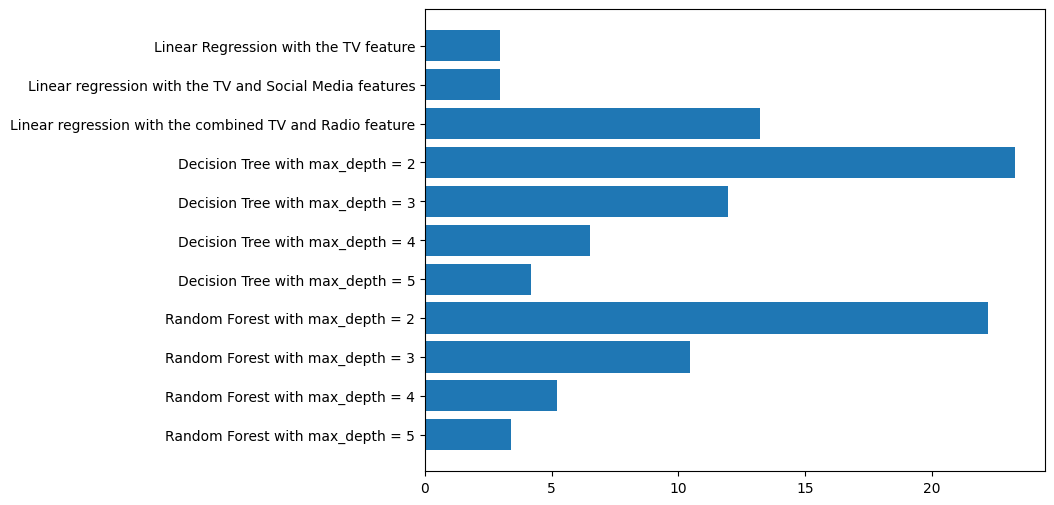

In [36]:
# plotting the bar plot for the result dictionary created earlier 'rmse'
plt.figure(figsize=(8, 6))
plt.barh(*zip(*rmse.items()))
plt.gca().invert_yaxis()
plt.show()

# Conclusion

* TV advertisement spend has the highest impact on Sales when compared to other media
* Linear Regression model with 'TV' gave the least RMSE
* Sales can be calculated by: <br> Sales = -0.6 + 3.56 * (TV)
* The above point indicates that is potentially a 3.56 increase in sales when 1 million USD is spent on TV adverstising